In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.svm import SVR,SVC
from sklearn.metrics import mean_squared_error,accuracy_score
from scipy.stats import uniform,randint
import warnings 
warnings.filterwarnings('ignore')

## Pierwszy dataset

In [3]:
data = pd.read_csv('./apartments.csv')

In [4]:
y = data.loc[:,'m2.price']
data.head(10)

,Unnamed: 0,m2.price,construction.year,surface,floor,no.rooms,district
0,1,5897,1953,25,3,1,Srodmiescie
1,2,1818,1992,143,9,5,Bielany
2,3,3643,1937,56,1,2,Praga
3,4,3517,1995,93,7,3,Ochota
4,5,3013,1992,144,6,5,Mokotow
5,6,5795,1926,61,6,2,Srodmiescie
6,7,2983,1970,127,8,5,Mokotow
7,8,2346,1985,105,8,4,Ursus
8,9,4745,1928,145,6,6,Srodmiescie
9,10,4284,1949,112,9,4,Srodmiescie


In [5]:
dummies = pd.get_dummies(data = data, columns = ['district'])
data[dummies.columns] = dummies
data.drop(['Unnamed: 0','m2.price','district'],axis=1,inplace=True)

Nie wykonuje żadnych przekstałceń danych, jedynie koduje kolumnę district,tak aby móc puścic na danych algorytm.

## Testy bez skalowania

In [6]:
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.2,random_state=41)

In [7]:
svm = SVR()
svm.fit(X_train,y_train)
pred = svm.predict(X_test)
score = mean_squared_error(y_test,pred,squared=False)
score

911.7676954177709

## Testy ze skalowaniem

In [8]:
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.2,random_state=41)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
svm = SVR()
svm.fit(X_train,y_train)
pred = svm.predict(X_test)
score = mean_squared_error(y_test,pred,squared=False)
score

888.5909778319751

Skalowanie dało niewielką poprawę wyniku, ale jest on co najmniej średni.

## Random search

In [10]:
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.2,random_state=41)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVR()

distributions = dict(C=uniform(loc=0, scale=100),
                     kernel = ['rbf','poly','linear','sigmoid'],
                    gamma = ['scale','auto'],
                    degree = randint(low=2,high=10))
clf = RandomizedSearchCV(svm, distributions, random_state=0,
                         scoring='neg_mean_squared_error',
                         n_jobs=-1,
                         cv=5
                        )
search = clf.fit(X_train,y_train)
print(f'Score: {np.sqrt(abs(clf.best_score_))}, Params: {search.best_params_}')


Score: 309.5049618003559, Params: {'C': 95.71551589530463, 'degree': 9, 'gamma': 'auto', 'kernel': 'rbf'}


In [11]:
svm = SVR(**search.best_params_)
svm.fit(X_train,y_train)
pred = svm.predict(X_test)
score = mean_squared_error(y_test,pred,squared=False)
score

281.5217489583574

Random search znacząco poprawił wyniki, które osiagnęłem poprzednio na zbiorze ze skalowaniem.

## Drugi dataset

In [12]:
data1 = pd.read_csv('./diabetes.csv')

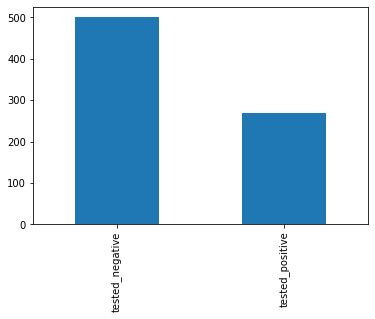

In [13]:
data1['class'].value_counts().plot(kind='bar')

Zmienna celu jest lekko niezbalansowana, ale nie jest to duża róznica.

In [14]:
data1['class'] = data1['class'].map({'tested_positive':1,'tested_negative':0})
data1

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
y1 = data1.loc[:,'class']
data1.drop(['class'],axis=1,inplace=True)

## Testy bez skalowania

In [16]:
X_train,X_test,y_train,y_test = train_test_split(data1,y1,test_size=0.2, random_state=41)

In [17]:
svm = SVC()
svm.fit(X_train,y_train)
pred = svm.predict(X_test)
score = accuracy_score(y_test,pred)
score

0.7597402597402597

## Testy ze skalowaniem

In [18]:
X_train,X_test,y_train,y_test = train_test_split(data1,y1,test_size=0.2, random_state=41)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
svm = SVC()
svm.fit(X_train,y_train)
pred = svm.predict(X_test)
score = accuracy_score(y_test,pred)
score

0.7857142857142857

Podobnie jak poprzednio skalowanie delikatnie poprawia wynik, co jasno sugeruje że ma ono wpływ na działanie algorytmu.

## Random search

In [20]:
X_train,X_test,y_train,y_test = train_test_split(data1,y1,test_size=0.2, random_state=41)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVC()

distributions = dict(C=uniform(loc=0, scale=100),
                     kernel = ['rbf','poly','linear','sigmoid'],
                    gamma = ['scale','auto'],
                    degree = randint(low=2,high=10))

clf = RandomizedSearchCV(svm, distributions, random_state=0,
                         scoring='accuracy',
                         n_jobs=-1,
                         cv=5
                        )
search = clf.fit(X_train,y_train)
print(f'Score: {clf.best_score_}, Params: {search.best_params_}')


Score: 0.7638811142209783, Params: {'C': 64.58941130666561, 'degree': 6, 'gamma': 'auto', 'kernel': 'linear'}


In [21]:
svm = SVC(**search.best_params_)
svm.fit(X_train,y_train)
pred = svm.predict(X_test)
score = accuracy_score(y_test,pred)
score

0.7857142857142857

Tym razem random search nie poprawił wyniku.